<h1>Импорт библиотек

In [7]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода


In [8]:
def sum_prod(matrix, vector):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    return sum([np.dot(matrix[i],vector[i]) for i in range(len(matrix))])

# Test



# Не пользовательский ввод.
print(sum_prod([[1, 2, 3, 4], [3, 4, 5, 6], [5, 6, 7, 8], [7, 8, 9, 10]],[1, 2, 3, 4]))
print(sum_prod([[[1, 2], [3, 4], [5, 6], [7, 8]],[[1- 1, 2 + 1], [3 - 1, 4 + 1], [5 - 2, 6 + 2], [7 - 3, 8 + 3]]],[[1, 2],[4, 3]]))



[50 60 70 80]
[14 34 53 72]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [32]:
def binarize(M, threshold=0.5):
    try:
        return np.where(np.array(M) > threshold, 1, 0)
    except (ValueError, TypeError):
        return ("Матрица должна иметь приемлимый выид и содержать только числа!")
        
# Test

print(binarize([[0, 1],[0.3, 0.7]]))

print(binarize([[1, 0],[0.500, 0.1]]))

print(binarize([['', 1],[0.3, '']]))

print(binarize([[0],[0.3]]))

print(binarize([[0, 1],[0.7]]))

[[0 1]
 [0 1]]
[[1 0]
 [0 0]]
Матрица должна иметь приемлимый выид и содержать только числа!
[[0]
 [0]]
Матрица должна иметь приемлимый выид и содержать только числа!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def is_numeric(value):
    return isinstance(value, (int, float))

def unique_rows(mat):
    for i in range(len(mat)):
        if not all(is_numeric(x) for x in mat[i]):
            return "Ошибка значений в строке! Все элементы должны быть числами."
        else:
            unique_elements = np.unique(mat[i])
            print(f"Уникальные элементы {i} строки - {unique_elements}")
        
def unique_columns(mat):
    mat = np.transpose(mat)
    for i in range(len(mat)):
        if not all(is_numeric(x) for x in mat[i]):
            return "Ошибка значений в столбце! Все элементы должны быть числами."
        else:
            unique_elements = np.unique(mat[i])
            print(f"Уникальные элементы {i} столбца - {unique_elements}")
    
print(unique_rows([[0, 1, 1],[0.3, 0.7, 0.7]]))

print(unique_columns([[1, 0],[0.500, 0.1]]))

print(unique_rows([['', 1],[0.3, '']]))

print(unique_columns([[0, ''],['', 0.3]]))

print(unique_columns([[0, 45],[0.7, 15]]))

Уникальные элементы 0 строки - [0 1]
Уникальные элементы 1 строки - [0.3 0.7]
None
Уникальные элементы 0 столбца - [0.5 1. ]
Уникальные элементы 1 столбца - [0.  0.1]
None
Ошибка значений в строке! Все элементы должны быть числами.
Ошибка значений в столбце! Все элементы должны быть числами.
Уникальные элементы 0 столбца - [0.  0.7]
Уникальные элементы 1 столбца - [15. 45.]
None


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]]
Мат ожидания:
 рядов - [7. 7. 7. 7.]
 колонок - [7. 7. 7. 7.]
Дисперсия:
рядов - [0. 0. 0. 0.]
 колонок - [0. 0. 0. 0.]


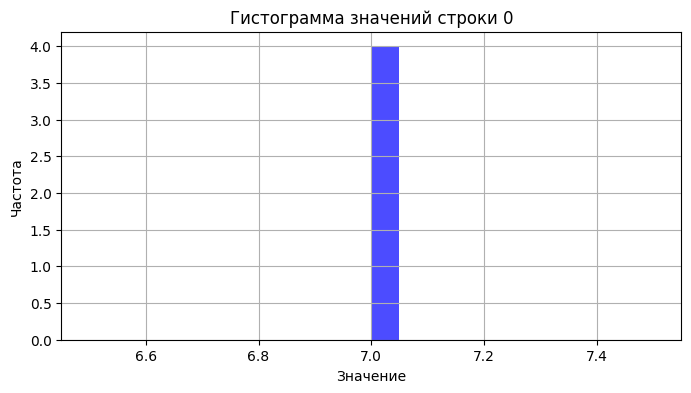

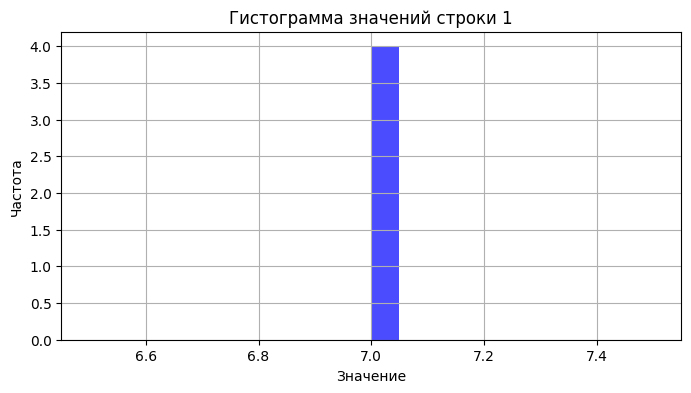

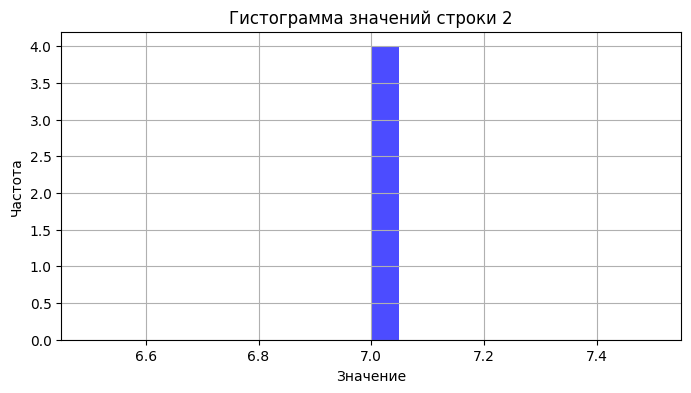

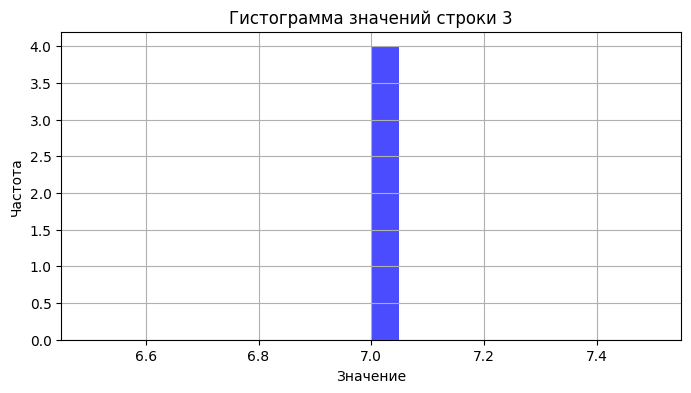

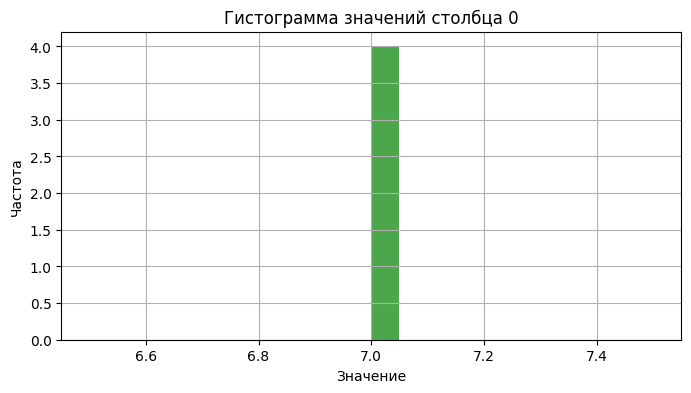

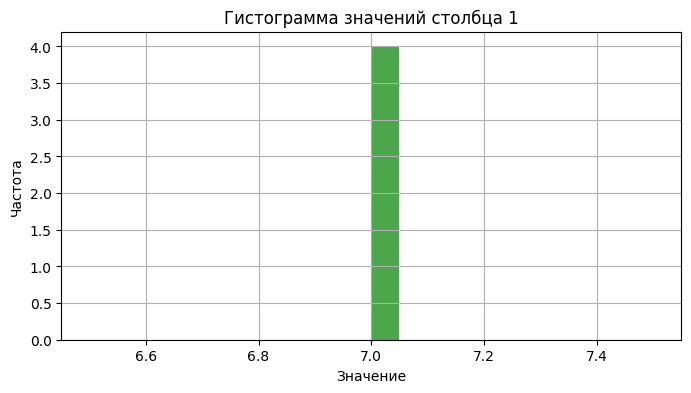

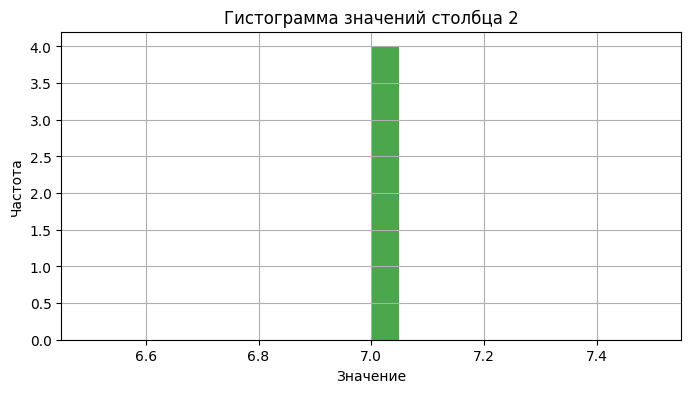

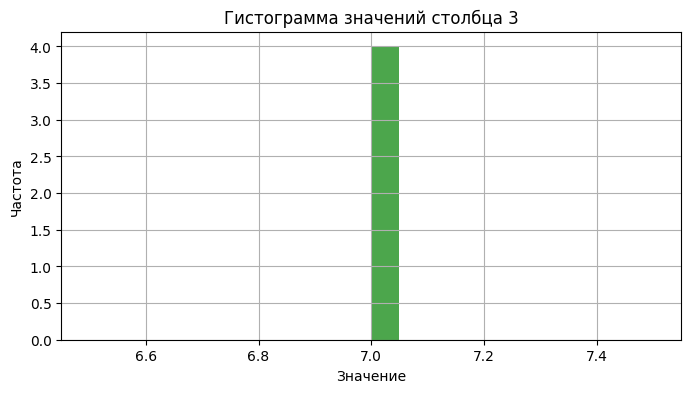

None


In [20]:
def random_matrix(m, n, mean, std):
    matrix = np.random.normal(loc=mean, scale=std, size=(m, n))
    print(matrix)
    #Мат ожидание
    row_means = np.mean(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)

    #Дисперсия
    row_variances = np.var(matrix, axis=1)
    col_variances = np.var(matrix, axis=0)

    print(f"Мат ожидания:\n рядов - {row_means}\n колонок - {col_means}\nДисперсия:\nрядов - {row_variances}\n колонок - {col_variances}")

    # Гистограммы для строк
    for i in range(m):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[i], bins=20, color='blue', alpha=0.7)
        plt.title(f'Гистограмма значений строки {i}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    # Гистограммы для столбцов
    for j in range(n):
        plt.figure(figsize=(8, 4))
        plt.hist(matrix[:, j], bins=20, color='green', alpha=0.7)
        plt.title(f'Гистограмма значений столбца {j}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

print(random_matrix(4,4,7,0))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = np.ones((m,n)) * b
    matrix [::2,::2] = a
    matrix [1::2,1::2] = a
    print(matrix)
    
# Test
chess (3, 4, 1, 2)
chess(4, 4, 0, 1)
chess(5, 5, 9, 8)   
chess(7,4,15,4)

[[1. 2. 1. 2.]
 [2. 1. 2. 1.]
 [1. 2. 1. 2.]]
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
[[9. 8. 9. 8. 9.]
 [8. 9. 8. 9. 8.]
 [9. 8. 9. 8. 9.]
 [8. 9. 8. 9. 8.]
 [9. 8. 9. 8. 9.]]
[[15.  4. 15.  4.]
 [ 4. 15.  4. 15.]
 [15.  4. 15.  4.]
 [ 4. 15.  4. 15.]
 [15.  4. 15.  4.]
 [ 4. 15.  4. 15.]
 [15.  4. 15.  4.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

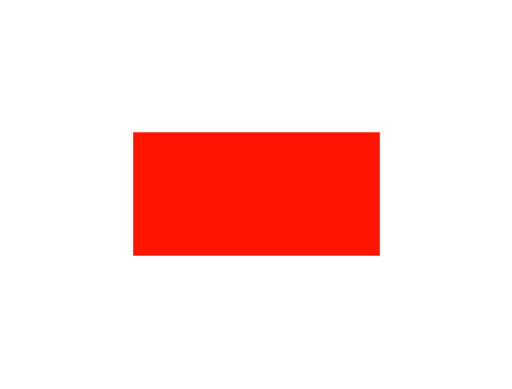

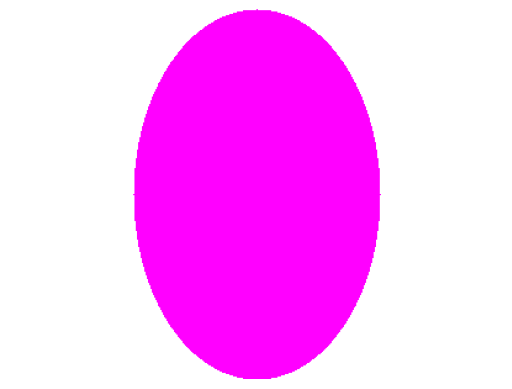

In [14]:


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    
    #Прямоугольник на изображении заданного размера с заданными цветами.
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    #Координаты углов прямоугольника
    x1, y1 = int((n - a) / 2), int((m - b) / 2)
    x2, y2 = x1 + a, y1 + b
    
    #Рисуем прямоугольник
    image[y1:y2, x1:x2] = rectangle_color
    
    # Отображаем изображение
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    
    #Овал на изображении заданного размера с заданными цветами.
    image = np.full((m, n, 3), background_color, dtype=np.uint8)
    
    #Центр овала
    x0, y0 = int(n / 2), int(m / 2)
    
    #Координатную сетка
    y, x = np.ogrid[0:m, 0:n]
    # Уравнение овала
    mask = ((x - x0) ** 2 / (a ** 2) + (y - y0) ** 2 / (b ** 2)) <= 1
    
    #Овал
    image[mask] = ellipse_color
    
    # Отображаем изображение
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Тесты
draw_rectangle(200, 100, 300, 400, (255, 20, 0), (255, 255, 255))
draw_ellipse(100, 150, 300, 400, (255, 0, 255), (255, 255, 255))


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [4]:

def calculate_statistics(time_series):
    
    #Математическое ожидание, дисперсия и стандартное отклонение временного ряда.
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_deviation = np.std(time_series)
    return mean, variance, std_deviation

def find_local_extremes(time_series):
    
    #Локальные экстремумы временного ряда.
    local_maxima = []
    local_minima = []
    n = len(time_series)
    
    for i in range(1, n - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append((i, time_series[i]))
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append((i, time_series[i]))
    
    return local_maxima, local_minima

def moving_average(time_series, p):
    #Ряд скользящего среднего с окном размера p.
    moving_avg_series = np.convolve(time_series, np.ones(p)/p, mode='valid')
    return moving_avg_series

# Пример временного ряда
time_series = np.array([2, 4, 6, 3, 8, 5, 7, 9, 2, 1])

# Вычисляем статистику
mean, variance, std_deviation = calculate_statistics(time_series)
print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Стандартное отклонение: {std_deviation}")

# Находим локальные максимумы и минимумы
local_maxima, local_minima = find_local_extremes(time_series)
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")

# Вычисляем ряд скользящего среднего с окном размера p
p = 3
moving_avg_series = moving_average(time_series, p)
print(f"Ряд скользящего среднего (p={p}):\n {moving_avg_series}")


Математическое ожидание: 4.7
Дисперсия: 6.81
Стандартное отклонение: 2.6095976701399777
Локальные максимумы: [(2, 6), (4, 8), (7, 9)]
Локальные минимумы: [(3, 3), (5, 5)]
Ряд скользящего среднего (p=3):
 [4.         4.33333333 5.66666667 5.33333333 6.66666667 7.
 6.         4.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [32]:
def one_hot_encoding(vector):
    try:
        arr = [[ 1 if vector[List] == i else 0 for i in range ( max(vector))] for List in range (len(vector))]
        arr[vector.index(max(vector))][-1] = 1
    except (IndexError, TypeError):
        return "Неверный ввод!"
    return arr

# Test
print(one_hot_encoding([1,7,3]))
print(one_hot_encoding([0,0,0,0,0,0]))
print(one_hot_encoding([1,0,1]))
print(one_hot_encoding(['','','']))
print(one_hot_encoding([100,99,98]))

    

[[0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0]]
Неверный ввод!
[[1], [1], [0]]
Неверный ввод!
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,